In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS=3

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 9485 files belonging to 3 classes.


In [12]:
class_name= dataset.class_names
class_name

['Potato Early blight', 'Potato Healthy', 'Potato Late blight']

In [13]:
len(dataset)

593

In [14]:
298*32

9536

In [15]:
for image_batch,lable_batch in dataset.take(1):
    print(image_batch.shape)
    print(lable_batch.numpy())
    

(16, 256, 256, 3)
[0 0 0 2 0 1 0 1 2 0 0 0 0 1 1 2]


In [16]:
for image_batch,lable_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[166. 164. 177.]
  [168. 166. 179.]
  [172. 170. 183.]
  ...
  [177. 175. 186.]
  [202. 200. 211.]
  [188. 186. 197.]]

 [[173. 171. 184.]
  [169. 167. 180.]
  [164. 162. 175.]
  ...
  [171. 169. 180.]
  [192. 190. 201.]
  [181. 179. 190.]]

 [[163. 161. 174.]
  [164. 162. 175.]
  [165. 163. 176.]
  ...
  [173. 171. 182.]
  [187. 185. 196.]
  [180. 178. 189.]]

 ...

 [[113. 107. 117.]
  [117. 111. 121.]
  [123. 117. 127.]
  ...
  [137. 132. 139.]
  [147. 142. 149.]
  [155. 150. 157.]]

 [[135. 129. 139.]
  [137. 131. 141.]
  [138. 132. 142.]
  ...
  [122. 117. 124.]
  [126. 121. 128.]
  [135. 130. 137.]]

 [[119. 113. 123.]
  [125. 119. 129.]
  [136. 130. 140.]
  ...
  [131. 126. 133.]
  [127. 122. 129.]
  [130. 125. 132.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


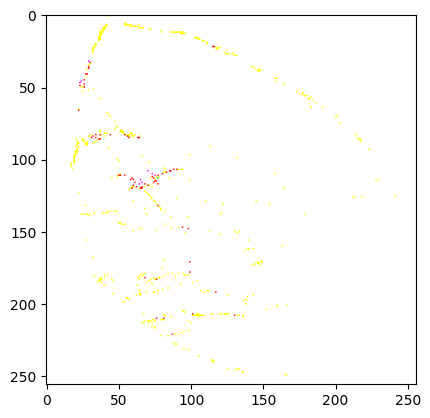

In [17]:
for image_batch,lable_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

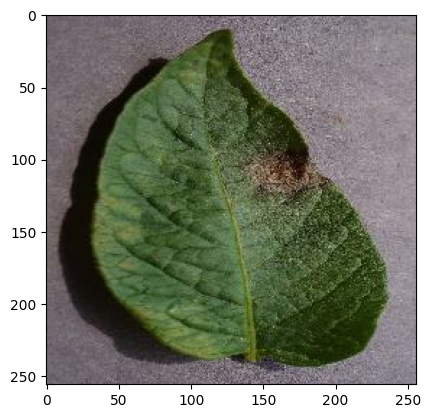

In [18]:
for image_batch,lable_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

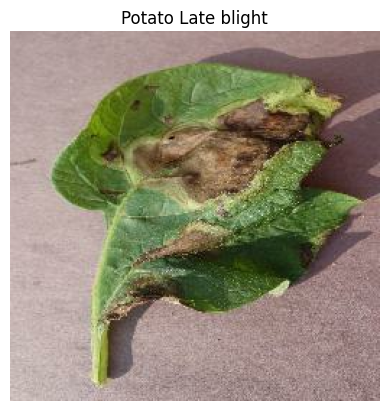

In [19]:
for image_batch,lable_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[lable_batch[0]])
    plt.axis("off")

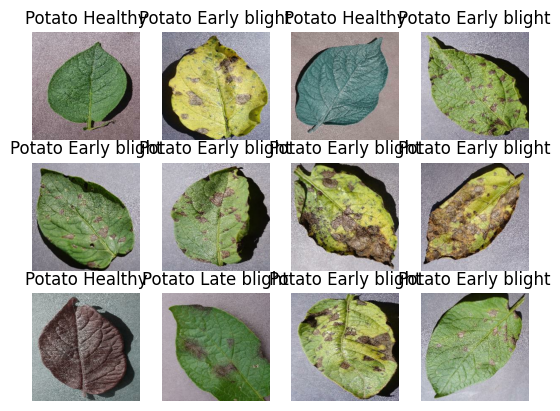

In [20]:
import numpy as np
import matplotlib.pyplot as plt
for image_batch,lable_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[lable_batch[i]])
        plt.axis("off")

In [21]:
len(dataset)

593

In [22]:
train_size = 0.8
len(dataset)*train_size

474.40000000000003

In [23]:
train_ds= dataset.take(474)

In [24]:
len(train_ds)

474

In [25]:
test_size=0.1
len(dataset)*test_size

59.300000000000004

In [26]:
test_ds=dataset.skip(59)

In [27]:
len(test_ds)

534

In [28]:
val_size=0.1
len(dataset)*val_size

59.300000000000004

In [29]:
val_ds=test_ds.take(59)

In [30]:
len(val_ds)

59

In [31]:
test_ds=test_ds.skip(59)

In [32]:
len(test_ds)

475

In [33]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
   ds_size = len(ds)

   if shuffle:
       ds=ds.shuffle(shuffle_size,seed=12)

   train_size = int(train_split*ds_size)
   val_size = int(val_split*ds_size)

   tarin_ds=ds.take(train_size)

   val_ds=ds.skip(train_size).take(val_size)
   test_ds=ds.skip(train_size).skip(val_size)

   return train_ds,val_ds,test_ds

In [34]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [35]:
len(train_ds)

474

In [36]:
len(val_ds)

59

In [37]:
len(test_ds)

60

In [38]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [39]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augmentation =tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [41]:

input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,  CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                 

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [44]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint_{epoch:02d}.h5',
                                      save_best_only=False,
                                      save_weights_only=False,
                                      monitor='val_loss',
                                      mode='min',
                                      verbose=1
                                      )

In [40]:



history = model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]
)

Epoch 1/10


In [45]:

checkpoint_path='./model_checkpoint_05.h5'
loaded_model = tf.keras.models.load_model(checkpoint_path)

In [46]:
history = model.fit(
    train_ds,
    epochs=2,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]
)

Epoch 1/2


474/474 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.7595
Epoch 1: saving model to model_checkpoint_01.h5


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


474/474 [==============================] - 1364s 3s/step - loss: 0.5263 - accuracy: 0.7595 - val_loss: 0.4216 - val_accuracy: 0.8263
Epoch 2/2
474/474 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.9553
Epoch 2: saving model to model_checkpoint_02.h5
474/474 [==============================] - 1323s 3s/step - loss: 0.1401 - accuracy: 0.9553 - val_loss: 0.1355 - val_accuracy: 0.9608


In [47]:
checkpoint_path='./model_checkpoint_02.h5'
loaded_model = tf.keras.models.load_model(checkpoint_path)

In [48]:
history = model.fit(
    train_ds,
    epochs=2,
    validation_data=val_ds,
    callbacks=[checkpoint_callback]
)

Epoch 1/2
474/474 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9628
Epoch 1: saving model to model_checkpoint_01.h5
474/474 [==============================] - 1794s 4s/step - loss: 0.1112 - accuracy: 0.9628 - val_loss: 0.0760 - val_accuracy: 0.9767
Epoch 2/2
474/474 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.9711
Epoch 2: saving model to model_checkpoint_02.h5
474/474 [==============================] - 2735s 6s/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.1816 - val_accuracy: 0.9492


In [49]:
model.save('potato_trained_model.h5')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
